# Модуль 11. **Рекурентні нейронні мережі** 

### Завдання

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.



На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.



Порівняйте результати та зробіть висновки.

In [167]:
# ! pip install keras --upgrade tensorflow --upgrade

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import (
    Embedding,
    Bidirectional,
    LSTM,
    GRU,
    SimpleRNN,
    Dense,
)

     Параметри 

In [169]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті

epochs = 8
batch_size = 16
optimizer = "rmsprop"
activation = "sigmoid"
loss_function = "binary_crossentropy"
skip_top = 6
dropout_rate = 0.3
verbose = 1
summary = False

     Завантаження даних 

In [170]:
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features, skip_top=skip_top
)

In [171]:
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [172]:
# розміри датасету
print(f"{input_train.shape = }")
print(f"    {y_train.shape = }")
print(f" {input_test.shape = }")
print(f"     {y_test.shape = }")

input_train.shape = (25000, 500)
    y_train.shape = (25000,)
 input_test.shape = (25000, 500)
     y_test.shape = (25000,)


In [173]:
# слова, що найчастіше зустрічаються в датасеті, та потенційно є "сміттям"
sorted_items = sorted(imdb_dict.items(), key=lambda item: item[1])
for k, v in sorted_items:
    if int(v) <= 20:
        print(f"{' ' if int(v)<10 else ''}{v} - {k}")

 1 - the
 2 - and
 3 - a
 4 - of
 5 - to
 6 - is
 7 - br
 8 - in
 9 - it
10 - i
11 - this
12 - that
13 - was
14 - as
15 - for
16 - with
17 - movie
18 - but
19 - film
20 - on


     Функція відображення графіків історії точності та втрат 
######      Аргументи: <br>1. history - дані історії точності та втрат<br>2. title - заголовок графіка

In [174]:
def plt_history(
    history, title="Точність та втрати на тренувальному та тестовому наборах"
):
    plt.figure(figsize=(10, 6))

    dict_data = {
        "acc": "Точність на тренувальному наборі",
        "val_acc": "Точність на тестовому наборі",
        "loss": "Втрати на тренувальному наборі",
        "val_loss": "Втрати на тестовому наборі",
    }

    epochs = range(1, len(history.history["acc"]) + 1)

    color_acc = "royalblue"
    color_loss = "peru"
    linestyle_train = "--"
    linestyle_test = "-"

    for data_, label_ in dict_data.items():
        plt.plot(
            epochs,
            history.history[data_],
            color=color_loss if (data_[-4:] == "loss") else color_acc,
            linestyle=linestyle_test if (data_[:3] == "val") else linestyle_train,
            label=label_,
        )

    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel("Епоха")
    plt.ylabel("Метрика")
    plt.legend()
    plt.show()

In [175]:
models, titles = [], [] # список моделей та їх назв

     Створення моделей 

# Simple Recurrent Neural Network (RNN)

In [176]:
title_rnn = "Simple Recurrent Neural Network (RNN)"

model_rnn = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_rnn.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_rnn.add(SimpleRNN(32, dropout=dropout_rate))
model_rnn.add(Dense(1, activation=activation))

titles.append(title_rnn)
models.append(model_rnn)

# Long Short-Term Memory (LSTM)

In [177]:
title_lstm = "Long Short-Term Memory (LSTM)"

model_lstm = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_lstm.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_lstm.add(LSTM(32, dropout=dropout_rate))
model_lstm.add(Dense(1, activation=activation))

titles.append(title_lstm)
models.append(model_lstm)

# Gated Recurrent Unit (GRU)

In [178]:
title_gru = "Gated Recurrent Unit (GRU)"

model_gru = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_gru.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_gru.add(GRU(32, dropout=dropout_rate))
model_gru.add(Dense(1, activation=activation))

titles.append(title_gru)
models.append(model_gru)

# Bidirectional Recurrent Neural Network (BRNN)

In [179]:
title_brnn = "Bidirectional Recurrent Neural Network (BRNN)"

model_brnn = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_brnn.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_brnn.add(Bidirectional(LSTM(32, dropout=dropout_rate)))
model_brnn.add(Dense(1, activation=activation))

titles.append(title_brnn)
models.append(model_brnn)

# Deep Recurrent Neural Network (DRNN)

In [180]:
title_drnn = "Deep Recurrent Neural Network (DRNN)"

model_drnn = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_drnn.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model_drnn.add(Bidirectional(LSTM(32, dropout=dropout_rate, return_sequences=True)))
model_drnn.add(Bidirectional(LSTM(32, dropout=dropout_rate)))
model_drnn.add(Dense(1, activation=activation))

titles.append(title_drnn)
models.append(model_drnn)

     Компіляція та навчання моделей 

In [181]:
histories = []

for i, model in enumerate(models):
    print(f"Training model {i+1} - \033[33m{titles[i]}\033[0m...")

    model.compile(optimizer=optimizer, loss=loss_function, metrics=["acc"])

    if summary:
        model.summary()

    history = model.fit(
        input_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        # validation_data=(input_test, y_test),
        verbose=verbose,
    )
    histories.append(history)

Training model 1 - Simple Recurrent Neural Network (RNN)...
Epoch 1/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 166s 131ms/step - acc: 0.6065 - loss: 0.6326 - val_acc: 0.8300 - val_loss: 0.4072
Epoch 2/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 159s 127ms/step - acc: 0.8219 - loss: 0.4086 - val_acc: 0.8378 - val_loss: 0.3843
Epoch 3/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 153s 122ms/step - acc: 0.8517 - loss: 0.3633 - val_acc: 0.8460 - val_loss: 0.3728
Epoch 4/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 108ms/step - acc: 0.8631 - loss: 0.3352 - val_acc: 0.8550 - val_loss: 0.3550
Epoch 5/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 113ms/step - acc: 0.8732 - loss: 0.3172 - val_acc: 0.8496 - val_loss: 0.3676
Epoch 6/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - acc: 0.8709 - loss: 0.3187 - val_acc: 0.8532 - val_loss: 0.3712
Epoch 7/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 118s 95ms/step - acc: 0.8709 - loss: 0.3190 - val_acc: 0.8476 - val_loss: 0.3728
Epoch 8/8
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 108ms/step - acc: 0.8776 - loss: 0

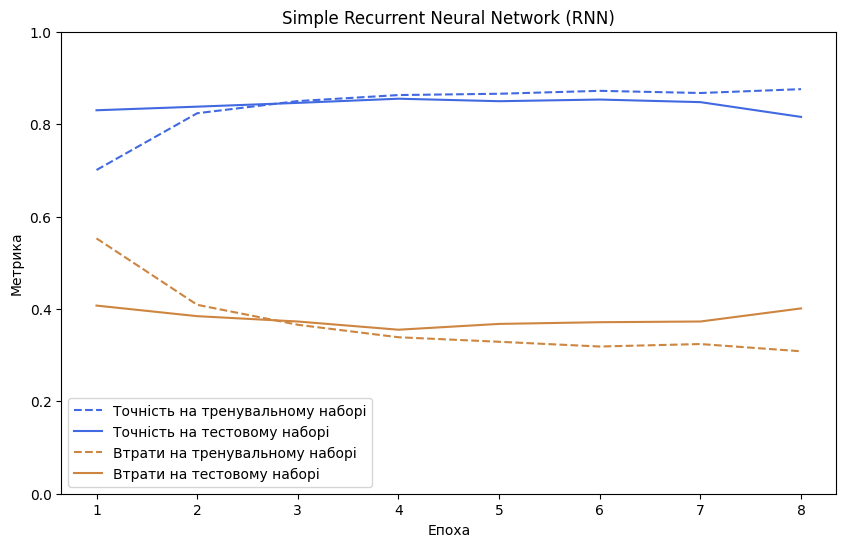

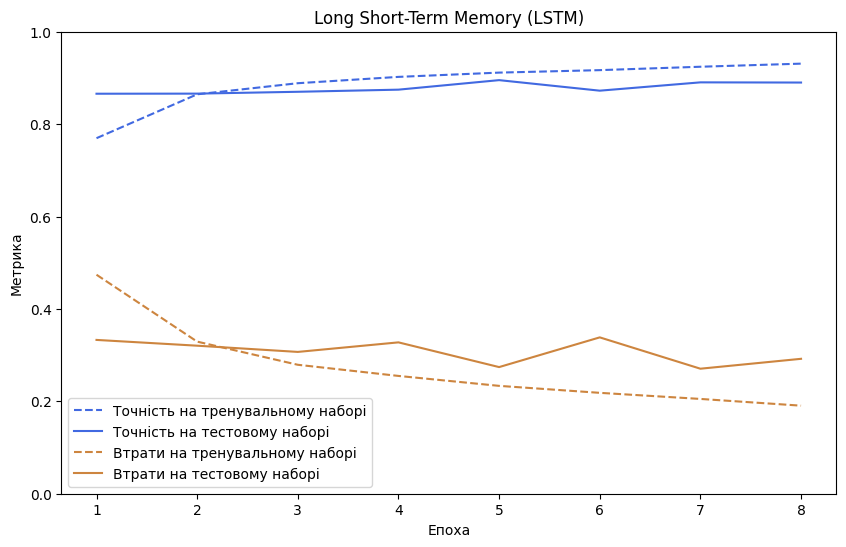

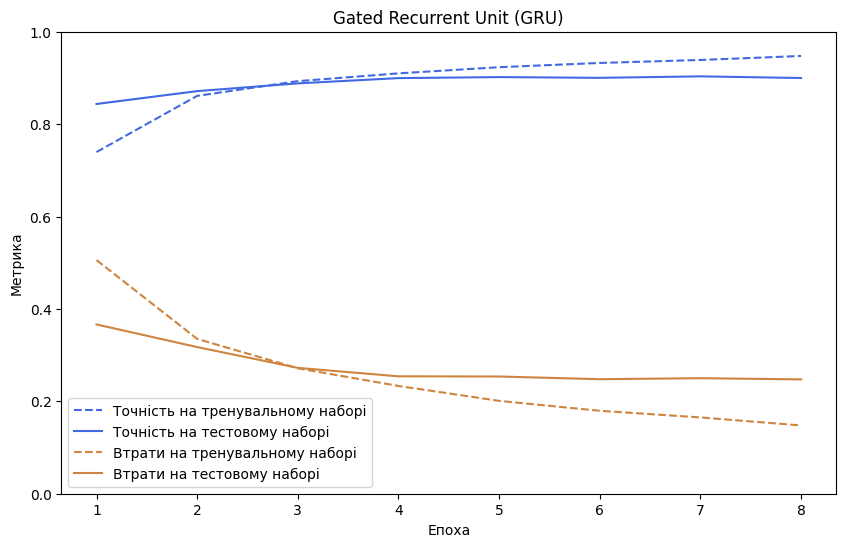

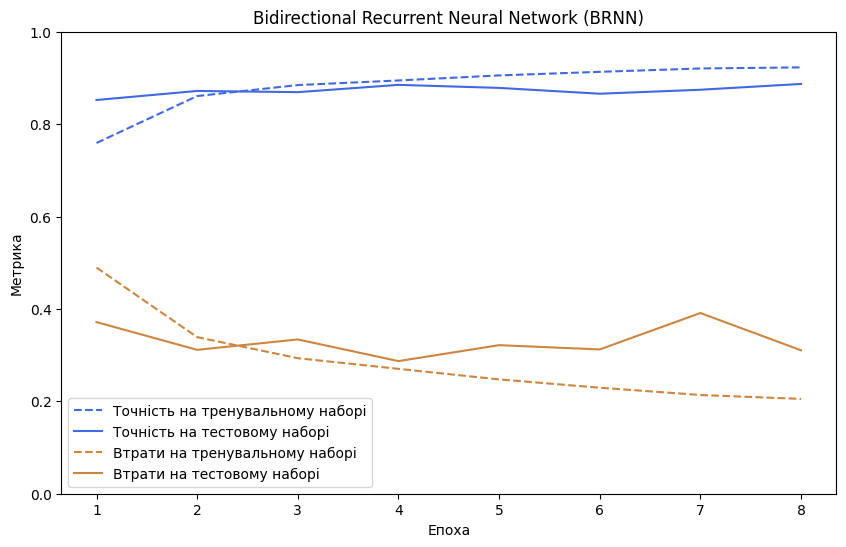

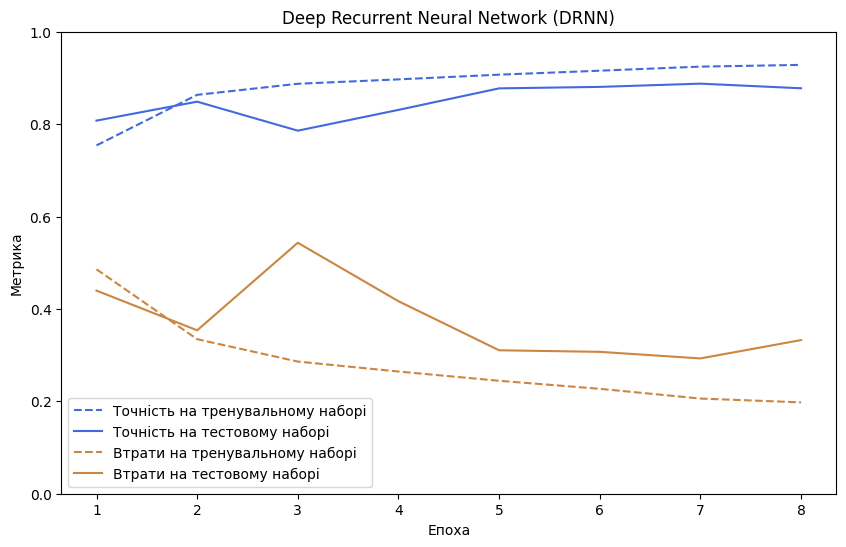

In [182]:
for i, history in enumerate(histories):
    plt_history(history, title=titles[i])

In [183]:
# Creating a list for options
train_acc, train_loss, val_acc, val_loss = [], [], [], []

# Collecting results from stories
for history in histories:
    train_acc.append(history.history["acc"][-1])
    train_loss.append(history.history["loss"][-1])
    val_acc.append(history.history["val_acc"][-1])
    val_loss.append(history.history["val_loss"][-1])

# Creating a DataFrame
df = pd.DataFrame(
    {
        "Model": titles,
        "Train Accuracy": train_acc,
        "Train Loss": train_loss,
        "Validation Accuracy": val_acc,
        "Validation Loss": val_loss,
    }
)

df.head(len(models))

,Model,Train Accuracy,Train Loss,Validation Accuracy,Validation Loss
0,Simple Recurrent Neural Network (RNN),0.8757,0.308333,0.8156,0.401121
1,Long Short-Term Memory (LSTM),0.9309,0.190596,0.8900,0.292004
2,Gated Recurrent Unit (GRU),0.9475,0.147791,0.8998,0.247483
3,Bidirectional Recurrent Neural Network (BRNN),0.9228,0.205248,0.8870,0.310427
4,Deep Recurrent Neural Network (DRNN),0.9282,0.197731,0.8776,0.332528


<div class="alert alert-block alert-info">

#### **Висновки:**

#### Найкращу точність на тестових даних показала модель *Gated Recurrent Unit (GRU)* - майже **90%**
#### На другому місці, з результатом **89.16%** - модель *Long Short-Term Memory (LSTM)*
#### Найгірша точність у моделі *Simple Recurrent Neural Network (RNN)* - **81,14%**
#### Всі моделі демонструюсь високу точність (>92%) на тренувальних даних, при цьому дуже швидко настає перенавчання, яке вдалося трохи зменшити за рахунок _dropout'у_ та _skip_top_
#### Модель *Deep Recurrent Neural Network (DRNN)* навчається в 2+ рази довше за решту, при цьому результат видає середній 

</div>